# Finding Testdata

## Helper functions

In [37]:
import random

import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import Mol, Bond
from rdkit.Chem.Descriptors import rdMolDescriptors as desc
from rdkit.Chem.Draw import rdMolDraw2D

import pubchem as pc
from mcs import find_largest_mcs

def has_heavy_atoms(m: Mol) -> bool:
    return desc.CalcNumHeavyAtoms(m) > 0

def analyze_bioassay(aid: int):
    mols = pc.mols_from_assay_id(aid)
    mols = list(filter(has_heavy_atoms, mols))

    heavy_atoms = list(map(desc.CalcNumHeavyAtoms, mols))

    plt.hist(heavy_atoms, bins=range(np.min(heavy_atoms), np.max(heavy_atoms)), edgecolor='black', alpha=0.7)
    plt.xlabel('Heavy Atoms')
    plt.ylabel('Frequency')
    plt.title('Heavy Atom Distribution')
    plt.show()

    mols_in_mcs, mcs_result = find_largest_mcs(mols)

    if mcs_result is None:
        print("could not compute mcs")
        return

    average_heavy_atoms = round(np.average(heavy_atoms))

    print("{} Molecules in original Assay".format(len(mols)))
    print("{} Molecules in MCS".format(len(mols_in_mcs)))
    print("{} Atoms average in Assay Molecules".format(average_heavy_atoms))
    print("{} Atoms in MCS".format(mcs_result.numAtoms))

    random_mol = mols_in_mcs[random.randint(0, len(mols_in_mcs)-1)]
    query = mcs_result.queryMol
    hits = list(random_mol.GetSubstructMatch(query))

    print("Random example Molecule in MCS:")
    draw_mol = rdMolDraw2D.MolDraw2DSVG(500, 500)

    hit_bonds = list[int]()
    bond: Bond
    for bond in query.GetBonds():
        aid1 = hits[bond.GetBeginAtomIdx()]
        aid2 = hits[bond.GetEndAtomIdx()]
        hit_bonds.append(random_mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())

    rdMolDraw2D.PrepareAndDrawMolecule(draw_mol, random_mol, highlightAtoms=hits, highlightBonds=hit_bonds)
    display(random_mol)

    print("MCS:")
    display(query)


## Datasets

### Platalet activating factor receptor antagonists

From: <https://pubchem.ncbi.nlm.nih.gov/bioassay/1806504#section=Result-Definitions>

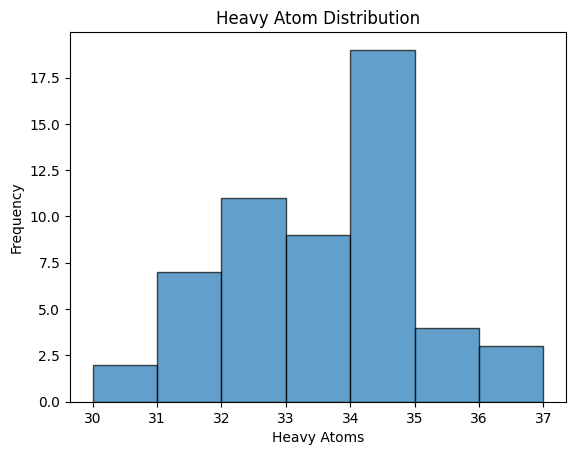

67 Molecules in original Assay
67 Molecules in MCS
34 Atoms average in Assay Molecules
28 Atoms in MCS
Random example Molecule in MCS:


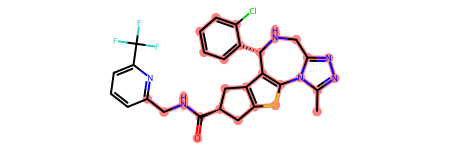

MCS:


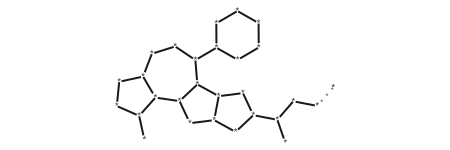

In [38]:
analyze_bioassay(1806504)

### Inhibitors of Influenza A virus A/WSN/1933(H1N1)) neuraminidase

From <https://pubchem.ncbi.nlm.nih.gov/protein/P03470>

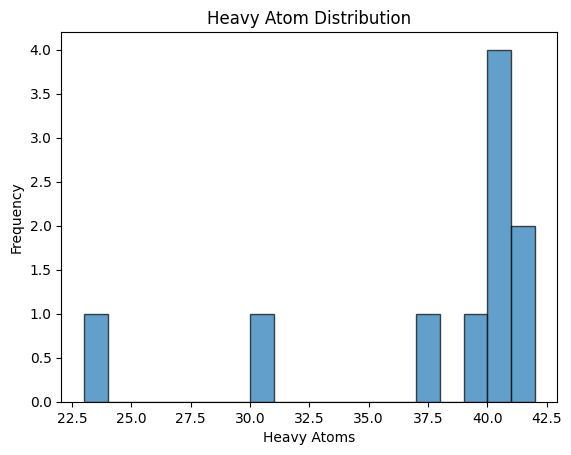

13 Molecules in original Assay
13 Molecules in MCS
39 Atoms average in Assay Molecules
23 Atoms in MCS
Random example Molecule in MCS:


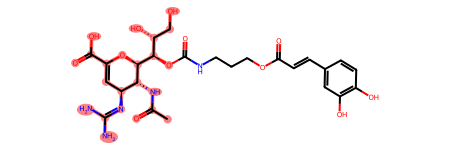

MCS:


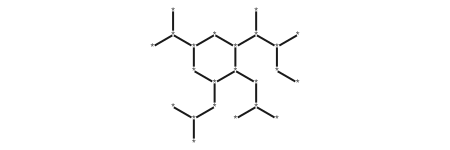

In [39]:
analyze_bioassay(716614)

### Antagonist activity assessed as inhibition of loperamide-stimulated [35S]GTPgammaS binding to human mu opioid receptor expressed in CHO cells

<https://pubchem.ncbi.nlm.nih.gov/bioassay/274396/version/8.3>

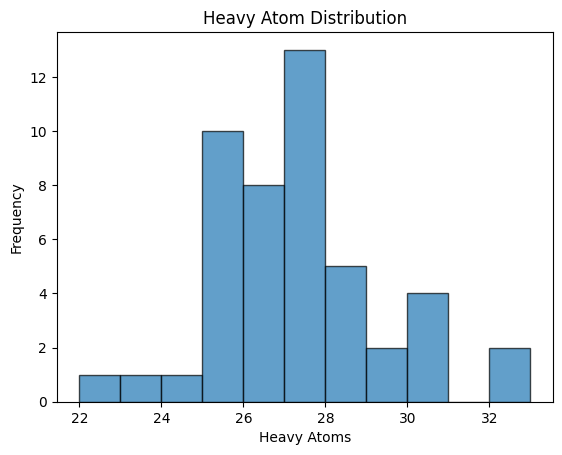

49 Molecules in original Assay
49 Molecules in MCS
27 Atoms average in Assay Molecules
16 Atoms in MCS
Random example Molecule in MCS:


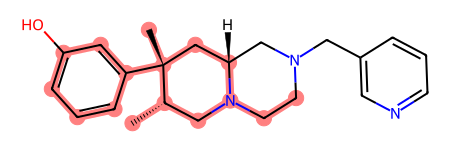

MCS:


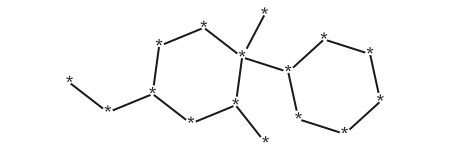

In [40]:
analyze_bioassay(274396)

### Affinity of [3H]DAMGO to the mu opioid receptor from rat brain
<https://pubchem.ncbi.nlm.nih.gov/bioassay/152374/>

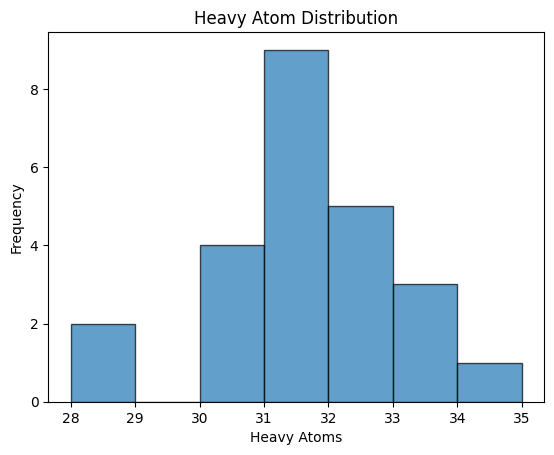

25 Molecules in original Assay
25 Molecules in MCS
31 Atoms average in Assay Molecules
14 Atoms in MCS
Random example Molecule in MCS:


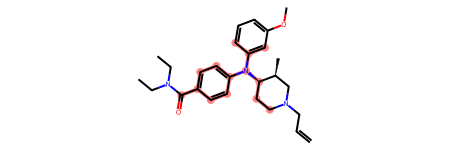

MCS:


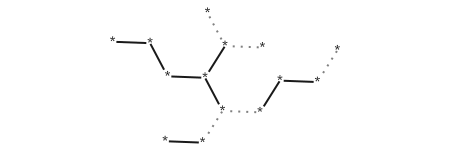

In [41]:
analyze_bioassay(152374)

### Displacement of [125I]metastin from human GPR54 receptor expressed in CHO cells
<https://pubchem.ncbi.nlm.nih.gov/bioassay/492217/#section=Description>

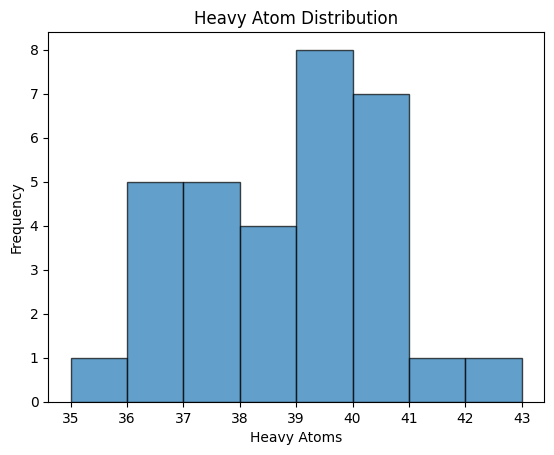

33 Molecules in original Assay
33 Molecules in MCS
39 Atoms average in Assay Molecules
28 Atoms in MCS
Random example Molecule in MCS:


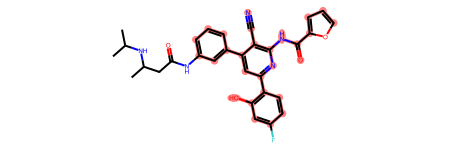

MCS:


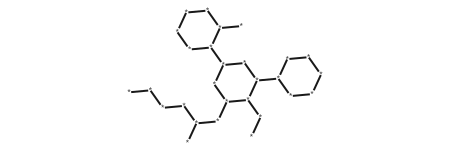

In [42]:
analyze_bioassay(492217)